In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from itertools import permutations, combinations

import os, sys, glob

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive 
drive.mount("/content/Drive/")

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [ ]:
files_combined = os.path.join("/content/Drive/MyDrive/Data/Restaurant/orderData", "*.csv")

#list of merged files returned 
files_combined = glob.glob(files_combined)

dfs = [pd.read_csv(csv_path, encoding = "ISO-8859-1") for csv_path in files_combined]
df = pd.concat(dfs)

salesData = df



In [ ]:
dineIn = salesData[salesData['Dining Option'] == 'Dine In']
empty = salesData[salesData['Dining Option'].isna()]

salesData_dineIn = pd.concat([dineIn, empty])

salesData_dineIn.loc[:, 'Order Date'] = pd.to_datetime(salesData_dineIn['Order Date'])
salesData_dineIn = salesData_dineIn.sort_values(by = 'Order Date')
salesData_dineIn.loc[:, 'Date'] = salesData_dineIn['Order Date'].dt.date
salesData_dineIn.loc[:, 'Month'] = salesData_dineIn['Order Date'].dt.month

In [ ]:
salesData_dineIn

,Location,Order Id,Order #,Sent Date,Order Date,Check Id,Server,Table,Dining Area,Service,...,Qty,Tax,Void?,Deferred,Tax Exempt,Tax Inclusion Option,Dining Option Tax,Tab Name,Date,Month
0,Fort Lauderdale,400000018007701108,3,3/1/22 10:45 AM,2022-03-01 10:43:00,400000018007701107,Gabriel Villarreal,NaN,NaN,NaN,...,1.0,0.70,True,False,False,Tax Not Included,No Effect,NaN,2022-03-01,3
1,Fort Lauderdale,400000018007701108,3,3/1/22 10:45 AM,2022-03-01 10:43:00,400000018007701107,Gabriel Villarreal,NaN,NaN,NaN,...,1.0,0.91,False,False,False,Tax Not Included,No Effect,NaN,2022-03-01,3
2,Fort Lauderdale,400000018007701108,3,3/1/22 10:46 AM,2022-03-01 10:43:00,400000018007701107,Gabriel Villarreal,NaN,NaN,NaN,...,1.0,0.70,False,False,False,Tax Not Included,No Effect,NaN,2022-03-01,3
3,Fort Lauderdale,400000018007766272,4,3/1/22 10:54 AM,2022-03-01 10:54:00,400000018007766271,Gabriel Villarreal,NaN,NaN,NaN,...,1.0,0.63,False,False,False,Tax Not Included,No Effect,NaN,2022-03-01,3
4,Fort Lauderdale,400000018007806796,5,3/1/22 10:59 AM,2022-03-01 10:59:00,400000018007806795,Quintara Burns,NaN,NaN,NaN,...,1.0,0.98,False,False,False,Tax Not Included,No Effect,NaN,2022-03-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,Fort Lauderdale,400000026364952333,148,12/31/22 7:45 PM,2022-12-31 19:44:00,400000026364952332,Victoria Realpe,NaN,NaN,Dinner,...,1.0,1.12,False,False,False,Tax Not Included,No Effect,NaN,2022-12-31,12
9523,Fort Lauderdale,400000026364973108,149,12/31/22 7:45 PM,2022-12-31 19:45:00,400000026364973107,Victoria Realpe,NaN,NaN,Dinner,...,1.0,0.00,False,True,False,Tax Not Included,NaN,NaN,2022-12-31,12
9524,Fort Lauderdale,400000026365002580,150,12/31/22 7:46 PM,2022-12-31 19:45:00,400000026365002579,Victoria Realpe,NaN,NaN,Dinner,...,1.0,0.00,False,True,False,Tax Not Included,NaN,NaN,2022-12-31,12
9525,Fort Lauderdale,400000026365023880,151,12/31/22 7:46 PM,2022-12-31 19:46:00,400000026365023878,Victoria Realpe,NaN,NaN,Dinner,...,1.0,0.00,False,True,False,Tax Not Included,NaN,NaN,2022-12-31,12


In [ ]:
# Make sure there are no catering orders
salesData_dineIn = salesData_dineIn[salesData_dineIn['Qty'] == 1]
salesData_dineIn = salesData_dineIn[salesData_dineIn['Menu'] != 'CATERING']

In [ ]:
newMenuDate = '2022-07-01'

### BYO Açaí Bowl

In [ ]:
acaiBowl = salesData_dineIn[salesData_dineIn['Menu Item'].str.contains('BYO Açaí Bowl')]

In [ ]:
acaiBowlSmall = acaiBowl[(acaiBowl['Gross Price'] == 8.99) | 
                         (acaiBowl['Gross Price'] == 9.99) | 
                         (acaiBowl['Gross Price'] == 10.99)]

acaiBowlRegular = acaiBowl[(acaiBowl['Gross Price'] == 11.99) | 
                         (acaiBowl['Gross Price'] == 12.99) | 
                         (acaiBowl['Gross Price'] == 13.99)]

acaiBowlSuper = acaiBowl[(acaiBowl['Gross Price'] >= 14.99)]

totalAcaiBowlOrders = len(acaiBowl)

#### Aggregating the monthly data

In [ ]:
regBowlsPc = acaiBowlRegular.groupby('Month').count()['Qty'].to_frame()
smallBowlsPc = acaiBowlSmall.groupby('Month').count()['Qty']
superBowlsPc = acaiBowlSuper.groupby('Month').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Month')).merge(superBowlsPc, on = 'Month').rename(columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

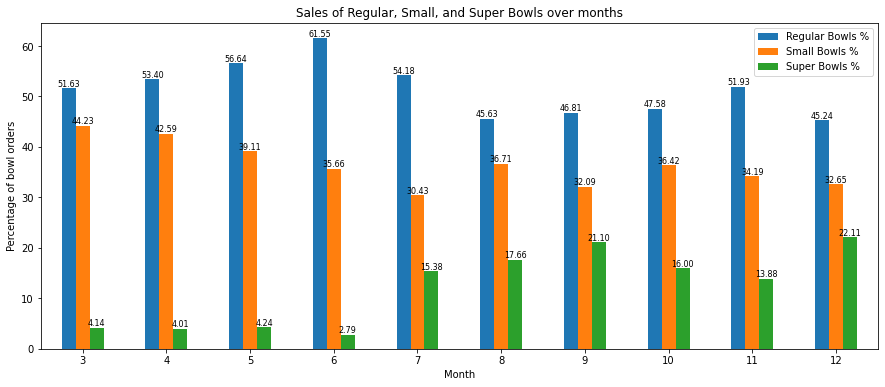

In [ ]:
ax = allData.plot(x = "Month", y = ["RegularPc", "SmallPc", "SuperPc"], kind = "bar", figsize = (15,6))
ax.bar_label(ax.containers[0], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[1], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[2], fontsize = 8, fmt = '%.2f')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of bowl orders')
plt.title('Sales of Regular, Small, and Super Bowls over months')
plt.legend(['Regular Bowls %', 'Small Bowls %', 'Super Bowls %'])
plt.show()

#### Aggregating the daily data

In [ ]:
regBowlsPc = acaiBowlRegular.groupby('Date').count()['Qty'].to_frame()
smallBowlsPc = acaiBowlSmall.groupby('Date').count()['Qty']
superBowlsPc = acaiBowlSuper.groupby('Date').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Date')).merge(superBowlsPc, on = 'Date').rename(columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})
allData = allData.sort_values(by = 'Date')

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

In [ ]:
allData['Date'] = pd.to_datetime(allData['Date'])

previousMenu = allData[allData['Date'] < newMenuDate]
newMenu = allData[allData['Date'] >= newMenuDate]

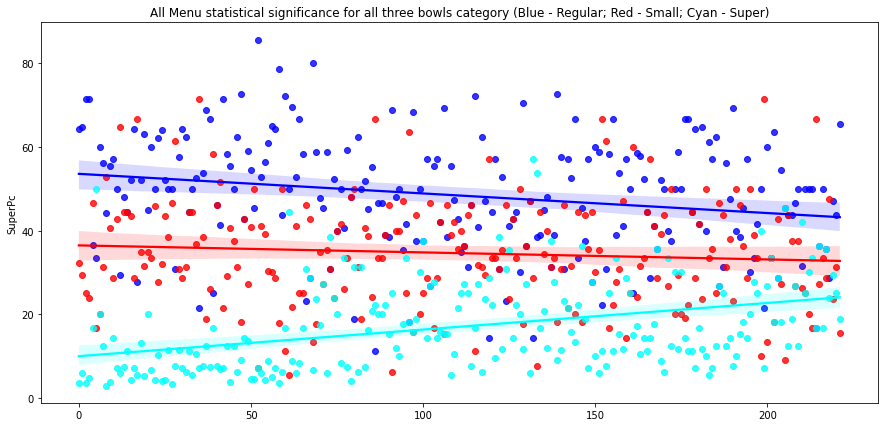

In [ ]:
plt.figure(figsize = (15,7))

sns.regplot(x = allData.index, y = allData.RegularPc, color = 'blue')
sns.regplot(x = allData.index, y = allData.SmallPc, color = 'red')
sns.regplot(x = allData.index, y = allData.SuperPc, color = 'cyan')

plt.title('All Menu statistical significance for all three bowls category (Blue - Regular; Red - Small; Cyan - Super)')

plt.show()

In [ ]:
fig = px.line(allData, x = "Date", y = ["RegularPc", "SmallPc", 'SuperPc'], 
              title = 'Sales of Regular, Small, and Super Bowls over dates',
              markers = True)

#fig.add_vline(x = newMenuDate, line_width = 1.5, line_color = "black")
fig.show()

### Matcha Green Bowl

In [ ]:
MatchaGreenBowl = salesData_dineIn[salesData_dineIn['Menu Item'].str.contains('Matcha Green Bowl')]

In [ ]:
MatchaGreenBowlSmall = MatchaGreenBowl[(MatchaGreenBowl['Gross Price'] == 8.99) | 
                         (MatchaGreenBowl['Gross Price'] == 9.99) | 
                         (MatchaGreenBowl['Gross Price'] == 10.99)]

MatchaGreenBowlRegular = MatchaGreenBowl[(MatchaGreenBowl['Gross Price'] == 11.99) | 
                         (MatchaGreenBowl['Gross Price'] == 12.99) | 
                         (MatchaGreenBowl['Gross Price'] == 13.99)]

MatchaGreenBowlSuper = MatchaGreenBowl[(MatchaGreenBowl['Gross Price'] >= 14.99)]

totalMatchaGreenBowlOrders = len(MatchaGreenBowl)

#### Aggregating the monthly data

In [ ]:
regBowlsPc = MatchaGreenBowlRegular.groupby('Month').count()['Qty'].to_frame()
smallBowlsPc = MatchaGreenBowlSmall.groupby('Month').count()['Qty']
superBowlsPc = MatchaGreenBowlSuper.groupby('Month').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Month', how = 'outer')).merge(superBowlsPc, on = 'Month', how = 'outer').rename(
    columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData = allData.fillna(0)
allData = allData.sort_values(by = 'Month')

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

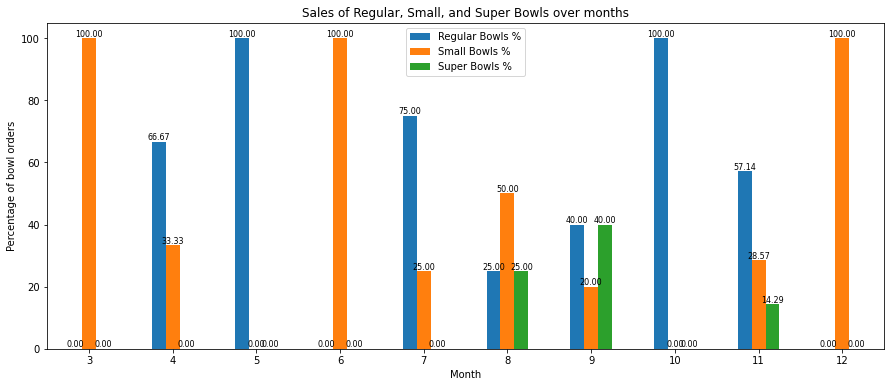

In [ ]:
ax = allData.plot(x = "Month", y = ["RegularPc", "SmallPc", "SuperPc"], kind = "bar", figsize = (15,6))
ax.bar_label(ax.containers[0], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[1], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[2], fontsize = 8, fmt = '%.2f')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of bowl orders')
plt.title('Sales of Regular, Small, and Super Bowls over months')
plt.legend(['Regular Bowls %', 'Small Bowls %', 'Super Bowls %'])
plt.show()

#### Aggregating the daily data

In [ ]:
regBowlsPc = MatchaGreenBowlRegular.groupby('Date').count()['Qty'].to_frame()
smallBowlsPc = MatchaGreenBowlSmall.groupby('Date').count()['Qty']
superBowlsPc = MatchaGreenBowlSuper.groupby('Date').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Date', how = 'outer')).merge(superBowlsPc, on = 'Date', how = 'outer').rename(
    columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData = allData.fillna(0)
allData = allData.sort_values(by = 'Date')

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

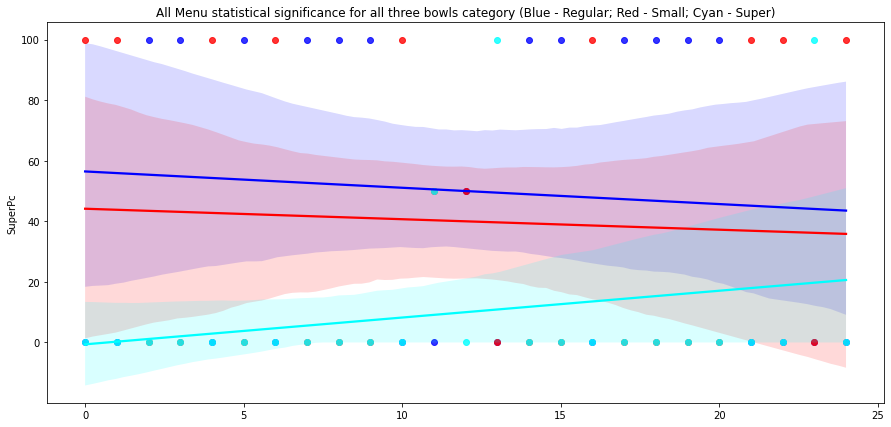

In [ ]:
plt.figure(figsize = (15,7))

sns.regplot(x =allData.index, y =allData.RegularPc, color = 'blue')
sns.regplot(x =allData.index, y =allData.SmallPc, color = 'red')
sns.regplot(x =allData.index, y =allData.SuperPc, color = 'cyan')

plt.title('All Menu statistical significance for all three bowls category (Blue - Regular; Red - Small; Cyan - Super)')

plt.show()

### BYO Chia Pudding Bowl

In [ ]:
ChiaPuddingBowl = salesData_dineIn[salesData_dineIn['Menu Item'].str.contains('BYO Chia Pudding Bowl')]

In [ ]:
ChiaPuddingBowlSmall = ChiaPuddingBowl[(ChiaPuddingBowl['Gross Price'] == 8.99) | 
                         (ChiaPuddingBowl['Gross Price'] == 9.99) | 
                         (ChiaPuddingBowl['Gross Price'] == 10.99)]

ChiaPuddingBowlRegular = ChiaPuddingBowl[(ChiaPuddingBowl['Gross Price'] == 11.99) | 
                         (ChiaPuddingBowl['Gross Price'] == 12.99) | 
                         (ChiaPuddingBowl['Gross Price'] == 13.99)]

ChiaPuddingBowlSuper = ChiaPuddingBowl[(ChiaPuddingBowl['Gross Price'] >= 14.99)]

totalChiaPuddingBowlOrders = len(ChiaPuddingBowl)

#### Aggregating the monthly data

In [ ]:
regBowlsPc = ChiaPuddingBowlRegular.groupby('Month').count()['Qty'].to_frame()
smallBowlsPc = ChiaPuddingBowlSmall.groupby('Month').count()['Qty']
superBowlsPc = ChiaPuddingBowlSuper.groupby('Month').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Month', how = 'outer')).merge(superBowlsPc, on = 'Month', how = 'outer').rename(
    columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData = allData.fillna(0)
allData = allData.sort_values(by = 'Month')

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

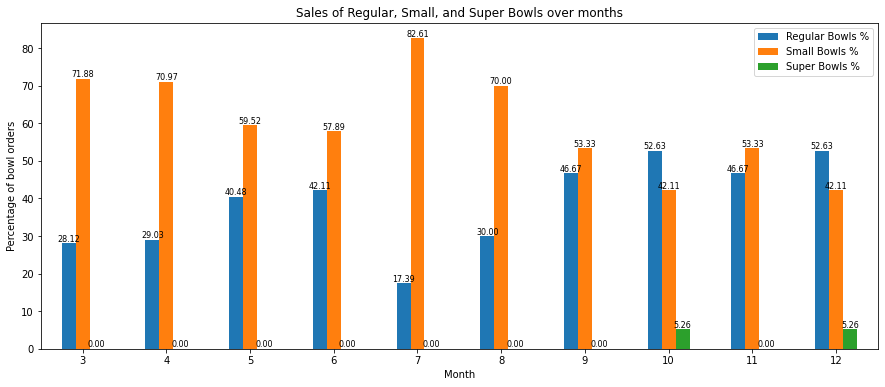

In [ ]:
ax = allData.plot(x = "Month", y = ["RegularPc", "SmallPc", "SuperPc"], kind = "bar", figsize = (15,6))
ax.bar_label(ax.containers[0], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[1], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[2], fontsize = 8, fmt = '%.2f')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of bowl orders')
plt.title('Sales of Regular, Small, and Super Bowls over months')
plt.legend(['Regular Bowls %', 'Small Bowls %', 'Super Bowls %'])
plt.show()

#### Aggregating the daily data

In [ ]:
regBowlsPc = ChiaPuddingBowlRegular.groupby('Date').count()['Qty'].to_frame()
smallBowlsPc = ChiaPuddingBowlSmall.groupby('Date').count()['Qty']
superBowlsPc = ChiaPuddingBowlSuper.groupby('Date').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Date', how = 'outer')).merge(superBowlsPc, on = 'Date', how = 'outer').rename(
    columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData = allData.fillna(0)
allData = allData.sort_values(by = 'Date')

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

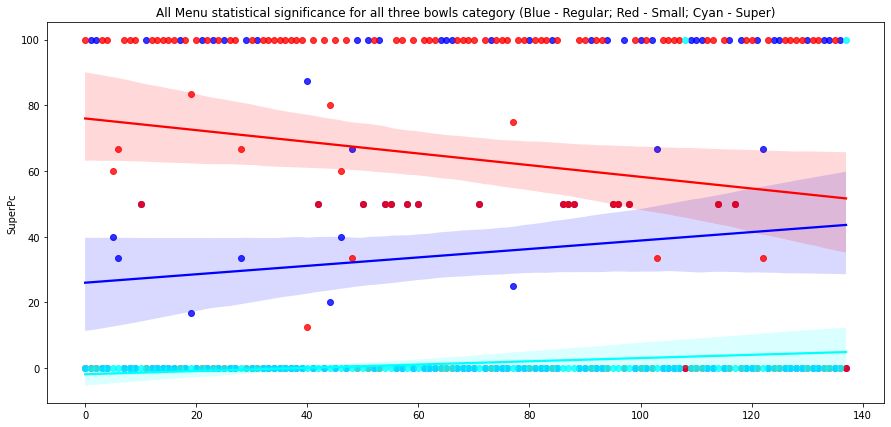

In [ ]:
plt.figure(figsize = (15,7))

sns.regplot(x = allData.index, y = allData.RegularPc, color = 'blue')
sns.regplot(x = allData.index, y = allData.SmallPc, color = 'red')
sns.regplot(x = allData.index, y = allData.SuperPc, color = 'cyan')

plt.title('All Menu statistical significance for all three bowls category (Blue - Regular; Red - Small; Cyan - Super)')

plt.show()

### BYO Dragonfruit Bowl

In [ ]:
dragonBowl = salesData_dineIn[salesData_dineIn['Menu Item'].str.contains('BYO Dragonfruit Bowl')]

In [ ]:
dragonBowlSmall = dragonBowl[(dragonBowl['Gross Price'] == 8.99) | 
                         (dragonBowl['Gross Price'] == 9.99) | 
                         (dragonBowl['Gross Price'] == 10.99)]

dragonBowlRegular = dragonBowl[(dragonBowl['Gross Price'] == 11.99) | 
                         (dragonBowl['Gross Price'] == 12.99) | 
                         (dragonBowl['Gross Price'] == 13.99)]

dragonBowlSuper = dragonBowl[(dragonBowl['Gross Price'] >= 14.99)]

totaldragonBowlOrders = len(dragonBowl)

#### Aggregating the monthly data

In [ ]:
regBowlsPc = dragonBowlRegular.groupby('Month').count()['Qty'].to_frame()
smallBowlsPc = dragonBowlSmall.groupby('Month').count()['Qty']
superBowlsPc = dragonBowlSuper.groupby('Month').count()['Qty']

In [ ]:
allData = (regBowlsPc.merge(smallBowlsPc, on = 'Month')).merge(superBowlsPc, on = 'Month').rename(columns = {'Qty_x': 'Regular',
                                                                                                 'Qty_y': 'Small',
                                                                                                 'Qty' : 'Super'})

In [ ]:
allData.loc[:, 'RegularPc'] = round(allData['Regular'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SmallPc'] = round(allData['Small'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)
allData.loc[:, 'SuperPc'] = round(allData['Super'] / (allData['Small'] + allData['Super'] + allData['Regular']) * 100, 2)

allData = allData.reset_index()

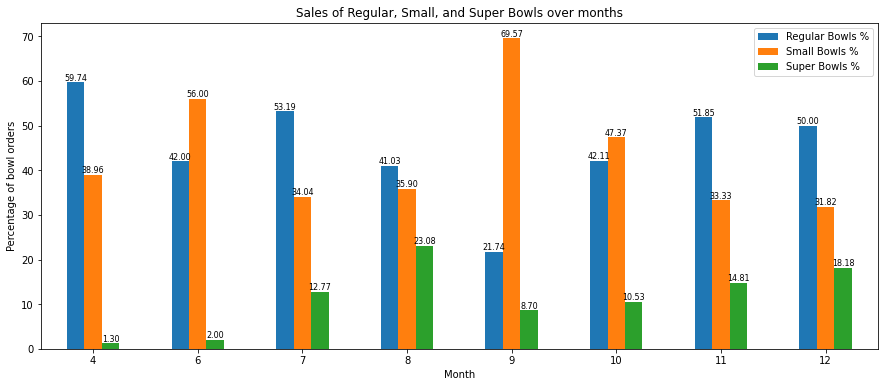

In [ ]:
ax = allData.plot(x = "Month", y = ["RegularPc", "SmallPc", "SuperPc"], kind = "bar", figsize = (15,6))
ax.bar_label(ax.containers[0], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[1], fontsize = 8, fmt = '%.2f')
ax.bar_label(ax.containers[2], fontsize = 8, fmt = '%.2f')
plt.xticks(rotation = 0)
plt.ylabel('Percentage of bowl orders')
plt.title('Sales of Regular, Small, and Super Bowls over months')
plt.legend(['Regular Bowls %', 'Small Bowls %', 'Super Bowls %'])
plt.show()

# 2. Change in Cookies sales

In [ ]:
salesData_dineIn['Date'] = pd.to_datetime(salesData_dineIn['Date'])
previousMenu = salesData_dineIn[salesData_dineIn['Date'] < newMenuDate]

newMenu = salesData_dineIn[salesData_dineIn['Date'] > newMenuDate]

### Previous Menu 4 Pack Cookie Pack Probability with other Cookies

In [ ]:
prevSnacks = previousMenu[previousMenu['Menu'] == 'SNACKS']

In [ ]:
prevSnacks['Menu Item'].unique()

array(['Whole Grain Chocolate Chip Cookie',
       'Whole Grain White Chocolate Macadamia Nut Cookie',
       'Choc Protein Chia Pudding',
       'Chocolate Turtle 2 pack ( Vegan, GF )', 'Fruit Bowl',
       '4 Pack Cookie Pack', 'Guacamole', 'Banana', 'Regular Bowl'],
      dtype=object)

In [ ]:
_4packCookie = prevSnacks[prevSnacks['Menu Item'].str.contains('4 Pack Cookie Pack')]

In [ ]:
_4packCookie['Menu Item'].unique()

array(['4 Pack Cookie Pack'], dtype=object)

In [ ]:
_4packCookieTrxns = _4packCookie['Order Id'].unique()

In [ ]:
_4packCookieTrxns[:10]

array([400000018119649463, 400000018443302801, 400000018760971615,
       400000018767503560, 400000018994013482, 400000019408587688,
       400000019463109973, 400000019463209200, 400000019478458410,
       400000019490319164])

In [ ]:

_4packCookieOrders = previousMenu[previousMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]

In [ ]:
_4packCookieOrders['Menu Item'].unique()

array(['4 Pack Cookie Pack', 'Whole Grain Chocolate Chip Cookie'],
      dtype=object)

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:
_4packCookieOrders['Group'].unique()

array(['4 Pack Cookie Pack',
       'Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack,Whole Grain Chocolate Chip Cookie',
       'Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack',
       '4 Pack Cookie Pack,4 Pack Cookie Pack'], dtype=object)

In [ ]:
groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

In [ ]:
len(groupedData)

58

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)


In [ ]:
combinationDf

,Combinations,count
0,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",4
1,"(Whole Grain Chocolate Chip Cookie, 4 Pack Coo...",4
3,"(4 Pack Cookie Pack, 4 Pack Cookie Pack)",2
2,"(4 Pack Cookie Pack, Whole Grain Chocolate Chi...",1


Now we find the probabilities of these items being sold together

In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]



Calculating the individual sales of the items from the sales data

In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())

Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together  


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])

Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(10).reset_index(drop = True).drop(labels = [0, 2], axis = 0).reset_index(drop = True)

In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(Whole Grain Chocolate Chip Cookie, 4 Pack Coo...",4,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack,5,60,0.061538
1,"(4 Pack Cookie Pack, Whole Grain Chocolate Chi...",1,4 Pack Cookie Pack,Whole Grain Chocolate Chip Cookie,60,5,0.015385


### New Menu 4 Pack Cookie Pack % Probability with other cookies

In [ ]:
newSnacks = newMenu[newMenu['Menu'] == 'SNACKS']

In [ ]:
_4packCookie = newSnacks[newSnacks['Menu Item'].str.contains('4 Pack Cookie Pack')]


In [ ]:
_4packCookieTrxns = _4packCookie['Order Id'].unique()

In [ ]:

_4packCookieOrders = newMenu[newMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]


In [ ]:
_4packCookieOrders['Menu Item'].unique()

array(['4 Pack Cookie Pack', 'Whole Grain Chocolate Chip Cookie'],
      dtype=object)

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:

groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

In [ ]:
len(groupedData)

19

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)

Now we find the probabilities of these items being sold together

In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]

Calculating the individual sales of the items from the sales data

In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())


Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(6).reset_index(drop = True).drop(labels = [0, 2], axis = 0).reset_index(drop = True)

In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(4 Pack Cookie Pack, Whole Grain Chocolate Chi...",5,4 Pack Cookie Pack,Whole Grain Chocolate Chip Cookie,20,8,0.178571
1,"(4 Pack Cookie Pack, 4 Pack Cookie Pack)",1,4 Pack Cookie Pack,4 Pack Cookie Pack,20,20,0.025000


### Previous Menu Whole Grain Chocolate Chip Cookie Probability with other cookies

In [ ]:
wholeGrainChoco = prevSnacks[prevSnacks['Menu Item'].str.contains('Whole Grain Chocolate Chip Cookie')]

In [ ]:
_4packCookieTrxns = wholeGrainChoco['Order Id'].unique()

In [ ]:

_4packCookieOrders = previousMenu[previousMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]

In [ ]:
_4packCookieOrders['Menu Item'].unique()

array(['Whole Grain Chocolate Chip Cookie',
       'Whole Grain White Chocolate Macadamia Nut Cookie',
       '4 Pack Cookie Pack', 'Carrot Cake Cookie Sandwich'], dtype=object)

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:
groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)


Now we find the probabilities of these items being sold together

In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]




Calculating the individual sales of the items from the sales data

In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
   


Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together         


In [ ]:

combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(10).reset_index(drop = True)

prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",461,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,1478,1478,0.155954
1,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",18,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,1478,25,0.011976
2,(Whole Grain White Chocolate Macadamia Nut Coo...,13,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,25,1478,0.008649
3,"(Whole Grain Chocolate Chip Cookie, Carrot Cak...",7,Whole Grain Chocolate Chip Cookie,Carrot Cake Cookie Sandwich,1478,11,0.004701
4,"(Whole Grain Chocolate Chip Cookie, 4 Pack Coo...",4,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack,1478,2,0.002703
5,"(Carrot Cake Cookie Sandwich, Whole Grain Choc...",4,Carrot Cake Cookie Sandwich,Whole Grain Chocolate Chip Cookie,11,1478,0.002686
6,"(4 Pack Cookie Pack, Whole Grain Chocolate Chi...",1,4 Pack Cookie Pack,Whole Grain Chocolate Chip Cookie,2,1478,0.000676
7,(Whole Grain White Chocolate Macadamia Nut Coo...,1,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,25,25,0.020000
8,"(Carrot Cake Cookie Sandwich, Carrot Cake Cook...",1,Carrot Cake Cookie Sandwich,Carrot Cake Cookie Sandwich,11,11,0.045455


### New Menu Whole Grain Chocolate Chip Cookie Probability with other cookies

In [ ]:
wholeGrainChoco = newSnacks[newSnacks['Menu Item'].str.contains('Whole Grain Chocolate Chip Cookie')]

In [ ]:
_4packCookieTrxns = wholeGrainChoco['Order Id'].unique()

In [ ]:

_4packCookieOrders = newMenu[newMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]


In [ ]:
_4packCookieOrders['Menu Item'].unique()

array(['Whole Grain Chocolate Chip Cookie', 'Carrot Cake Cookie Sandwich',
       'Whole Grain White Chocolate Macadamia Nut Cookie',
       '4 Pack Cookie Pack'], dtype=object)

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:

groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe


In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)


Now we find the probabilities of these items being sold together


In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]


Calculating the individual sales of the items from the sales data


In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
   

Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together                   


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(10).reset_index(drop = True)

prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",405,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,1540,1540,0.131494
1,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",16,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,1540,24,0.010230
2,(Whole Grain White Chocolate Macadamia Nut Coo...,12,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,24,1540,0.007673
3,"(Carrot Cake Cookie Sandwich, Whole Grain Choc...",6,Carrot Cake Cookie Sandwich,Whole Grain Chocolate Chip Cookie,8,1540,0.003876
4,"(Whole Grain Chocolate Chip Cookie, Carrot Cak...",5,Whole Grain Chocolate Chip Cookie,Carrot Cake Cookie Sandwich,1540,8,0.003230
5,"(4 Pack Cookie Pack, Whole Grain Chocolate Chi...",5,4 Pack Cookie Pack,Whole Grain Chocolate Chip Cookie,2,1540,0.003243
6,"(Whole Grain Chocolate Chip Cookie, 4 Pack Coo...",3,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack,1540,2,0.001946
7,(Whole Grain White Chocolate Macadamia Nut Coo...,2,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,24,24,0.041667
8,"(Carrot Cake Cookie Sandwich, Carrot Cake Cook...",1,Carrot Cake Cookie Sandwich,Carrot Cake Cookie Sandwich,8,8,0.062500


### Previous Menu Whole Grain White Chocolate Probability with other Cookies

In [ ]:
wholeGrainWhite = prevSnacks[prevSnacks['Menu Item'].str.contains('Whole Grain White Chocolate Macadamia Nut Cookie')]

In [ ]:
_4packCookieTrxns = wholeGrainWhite['Order Id'].unique()

In [ ]:
_4packCookieOrders = previousMenu[previousMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]


In [ ]:
_4packCookieOrders['Menu Item'].unique()

array(['Whole Grain White Chocolate Macadamia Nut Cookie',
       'Whole Grain Chocolate Chip Cookie', 'Carrot Cake Cookie Sandwich'],
      dtype=object)

In [ ]:
_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:
groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe


In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)

Now we find the probabilities of these items being sold together


In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]

Calculating the individual sales of the items from the sales data


In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())

Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together          


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head().reset_index(drop = True)

In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,(Whole Grain White Chocolate Macadamia Nut Coo...,22,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,147,147,0.074830
1,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",18,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,29,147,0.102273
2,(Whole Grain White Chocolate Macadamia Nut Coo...,13,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,147,29,0.073864
3,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",6,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,29,29,0.103448
4,(Whole Grain White Chocolate Macadamia Nut Coo...,1,Whole Grain White Chocolate Macadamia Nut Cookie,Carrot Cake Cookie Sandwich,147,1,0.006757


### New Menu Whole Grain White Chocolate Probability with other Cookies

In [ ]:
wholeGrainWhite = newSnacks[newSnacks['Menu Item'].str.contains('Whole Grain White Chocolate Macadamia Nut Cookie')]

In [ ]:
_4packCookieTrxns = wholeGrainWhite['Order Id'].unique()

In [ ]:
_4packCookieOrders = newMenu[newMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:
_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]


In [ ]:
_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:
groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)

Now we find the probabilities of these items being sold together


In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]

Calculating the individual sales of the items from the sales data


In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())

Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together                       


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(5).reset_index(drop = True)

In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,(Whole Grain White Chocolate Macadamia Nut Coo...,33,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,211,211,0.078199
1,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",16,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,25,211,0.067797
2,(Whole Grain White Chocolate Macadamia Nut Coo...,12,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,211,25,0.050847
3,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",3,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,25,25,0.060000


### Previous Menu Overall Cookies Probability 

In [ ]:
allCookies = prevSnacks[prevSnacks['Menu Item'].str.contains('Cookie')]


In [ ]:
_4packCookieTrxns = allCookies['Order Id'].unique()

In [ ]:

_4packCookieOrders = previousMenu[previousMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:

_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:

groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))



In [ ]:

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)



Now we find the probabilities of these items being sold together


In [ ]:
combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]


Calculating the individual sales of the items from the sales data


In [ ]:
combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())

 Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together


In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])

Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(5).reset_index(drop = True)

In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",461,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,1478,1478,0.155954
1,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",22,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,1478,147,0.013538
2,(Whole Grain White Chocolate Macadamia Nut Coo...,22,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,147,147,0.074830
3,(Whole Grain White Chocolate Macadamia Nut Coo...,13,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,147,1478,0.008000
4,"(Whole Grain Chocolate Chip Cookie, 4 Pack Coo...",8,Whole Grain Chocolate Chip Cookie,4 Pack Cookie Pack,1478,60,0.005202


### New Menu Overall Cookies Probability 

In [ ]:
allCookies = newSnacks[newSnacks['Menu Item'].str.contains('Cookie')]

In [ ]:

_4packCookieTrxns = allCookies['Order Id'].unique()

In [ ]:

_4packCookieOrders = newMenu[newMenu['Order Id'].isin(_4packCookieTrxns)]

In [ ]:

_4packCookieOrders = _4packCookieOrders[_4packCookieOrders['Menu Item'].str.contains('Cookie')]

In [ ]:

_4packCookieOrders['Group'] = _4packCookieOrders.groupby('Order Date')['Menu Item'].transform(lambda x: ','.join(x))

In [ ]:

groupedData = _4packCookieOrders[['Order Date', 'Group']]
groupedData = groupedData.drop_duplicates()

Counting for the combinations which the items have in the dataframe and store them in a new dataframe

In [ ]:
count = Counter()
for row in groupedData['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

combinationDf = pd.DataFrame.from_dict(count, orient='index').reset_index().rename(columns={'index':'Combinations', 0:'count'})
combinationDf.sort_values(by = 'count', ascending = False, inplace = True)


Now we find the probabilities of these items being sold together


In [ ]:

combinationDf.loc[:, 'item1'] = combinationDf.Combinations.str[0]
combinationDf.loc[:, 'item2'] = combinationDf.Combinations.str[1]

Calculating the individual sales of the items from the sales data


In [ ]:

combinationDf.loc[:, 'item1Sales'] = combinationDf['item1'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())
combinationDf.loc[:, 'item2Sales'] = combinationDf['item2'].map(_4packCookieOrders
                                                                .groupby('Menu Item').count()['Qty'].to_dict())

Calculating the probability of the items being sold together by dividing the count of items sold together by the sum of individual number of sales of the sold items together

In [ ]:
combinationDf.loc[:, 'Probability'] = combinationDf['count'] / (combinationDf['item1Sales'] + combinationDf['item2Sales'])


Selecting the top 10 combinations of the items so that we can see the items which most commonly sold together along with their probabilities


In [ ]:
prob = combinationDf.head(5).reset_index(drop = True)


In [ ]:
prob

,Combinations,count,item1,item2,item1Sales,item2Sales,Probability
0,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",405,Whole Grain Chocolate Chip Cookie,Whole Grain Chocolate Chip Cookie,1540,1540,0.131494
1,(Whole Grain White Chocolate Macadamia Nut Coo...,33,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,211,211,0.078199
2,"(Whole Grain Chocolate Chip Cookie, Whole Grai...",17,Whole Grain Chocolate Chip Cookie,Whole Grain White Chocolate Macadamia Nut Cookie,1540,211,0.009709
3,(Whole Grain White Chocolate Macadamia Nut Coo...,13,Whole Grain White Chocolate Macadamia Nut Cookie,Whole Grain Chocolate Chip Cookie,211,1540,0.007424
4,"(Carrot Cake Cookie Sandwich, Whole Grain Choc...",6,Carrot Cake Cookie Sandwich,Whole Grain Chocolate Chip Cookie,8,1540,0.003876
